### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import training set

train_csv = pd.read_csv('D:/deep learning/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv')

train_data = train_csv.iloc[:,1:2].values


In [3]:
train_csv.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

train_scaled = sc.fit_transform(train_data)

In [5]:
print(train_scaled)
print(len(train_scaled))

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]
1258


In [6]:
# creating data structure with  60 time steps  and 1 output

X_train = []
y_train = []

for i in range(60,len(train_scaled)):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])
    
    
X_train, y_train = np.array(X_train), np.array(y_train)


In [7]:
print(X_train[0])
print(X_train.shape)
print(y_train.shape)

[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
 0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
 0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
 0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
 0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
 0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
 0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
 0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
 0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
 0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656]
(1198, 60)
(1198,)


In [8]:
# reshaping
X_train = np.reshape(X_train, newshape = (X_train.shape[0],X_train.shape[1], 1))

In [9]:
from tensorflow.keras.layers import Dense, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(1))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [12]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr =1e-4 )
model.compile(optimizer = 'adam',loss = 'mse')

In [13]:
model.fit(X_train,y_train,epochs = 100,batch_size=32,verbose =1)

Epoch 1/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0399
Epoch 2/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0080
Epoch 3/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0051
Epoch 13/100
38/38 [=====

In [14]:
#loading real stock price i.e is test dataset

test_csv = pd.read_csv('D:/deep learning/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv')

actual_price = test_csv.iloc[:,1:2].values

In [15]:
#concatenate train and test data

data_total = pd.concat((train_csv['Open'],test_csv['Open']),axis = 0)

In [16]:
inputs = data_total[len(data_total)-len(test_csv)- 60:].values

inputs = inputs.reshape(-1,1)
#print(inputs)
inputs = sc.transform(inputs)

In [17]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [18]:
print(X_test)

[[[0.9299055 ]
  [0.93113327]
  [0.92750577]
  ...
  [0.95725128]
  [0.93796041]
  [0.93688146]]

 [[0.93113327]
  [0.92750577]
  [0.94415507]
  ...
  [0.93796041]
  [0.93688146]
  [0.92955205]]

 [[0.92750577]
  [0.94415507]
  [0.93876032]
  ...
  [0.93688146]
  [0.92955205]
  [0.94731751]]

 ...

 [[0.96054394]
  [0.9371419 ]
  [0.92841729]
  ...
  [1.01045465]
  [1.02407173]
  [1.03930724]]

 [[0.9371419 ]
  [0.92841729]
  [0.90804747]
  ...
  [1.02407173]
  [1.03930724]
  [1.03354044]]

 [[0.92841729]
  [0.90804747]
  [0.8771858 ]
  ...
  [1.03930724]
  [1.03354044]
  [0.99624228]]]


In [19]:
pred_price = model.predict(X_test)
pred_price = sc.inverse_transform(pred_price)

In [20]:
print(pred_price)

[[786.4851 ]
 [783.6208 ]
 [783.29913]
 [784.0177 ]
 [786.69794]
 [791.9075 ]
 [796.92554]
 [799.23486]
 [799.79614]
 [799.6071 ]
 [799.2725 ]
 [798.9375 ]
 [798.78   ]
 [799.38074]
 [800.4629 ]
 [804.926  ]
 [811.59076]
 [818.931  ]
 [823.3157 ]
 [820.18445]]


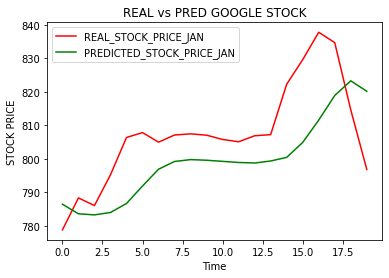

In [21]:
#visualize

plt.plot(actual_price, color = 'red',label = 'REAL_STOCK_PRICE_JAN')
plt.plot(pred_price, color = 'green',label = 'PREDICTED_STOCK_PRICE_JAN')
plt.title('REAL vs PRED GOOGLE STOCK')
plt.xlabel('Time')
plt.ylabel('STOCK PRICE')
plt.legend()
plt.show()